# Analysinig the Data in the File 
 Handling Missing as well as other values and categories 

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
diabetes_df = pd.read_csv("D:\Data Analysis With Python\Diabetes_Data_Set\data\diabetes.csv");

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_20236\3794751360.py:1: SyntaxWarning: invalid escape sequence '\D'
  diabetes_df = pd.read_csv("D:\Data Analysis With Python\Diabetes_Data_Set\data\diabetes.csv");


In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Skin Thickness')

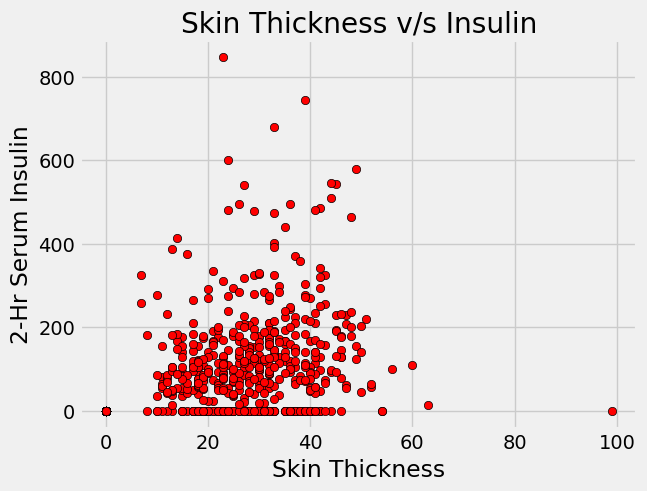

In [35]:
plt.style.use('fivethirtyeight')
plt.scatter(x='SkinThickness',y='Insulin',data=diabetes_df,edgecolors='black',c='r')
plt.title("Skin Thickness v/s Insulin")
plt.ylabel('2-Hr Serum Insulin')
plt.xlabel("Skin Thickness")

Text(0, 0.5, 'BMI')

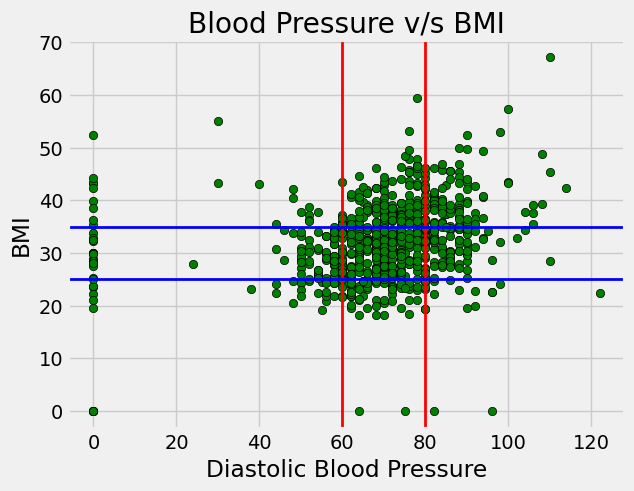

In [28]:
plt.style.use('fivethirtyeight')
plt.scatter(x='BloodPressure',y='BMI',data=diabetes_df,edgecolors='black',c='g')
plt.axvline(x=80,linewidth=2,color='red')
plt.axvline(x=60,linewidth=2,color='red')
plt.axhline(y=25,linewidth=2,color='blue')
plt.axhline(y=35,linewidth=2,color='blue')
plt.title("Blood Pressure v/s BMI")
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel("BMI")

25-30 --> Overwieght
30-35 --> Moderatley Obese 
35-40 --> Severely Obese

Text(0, 0.5, 'DiabetesPedigreeFunction')

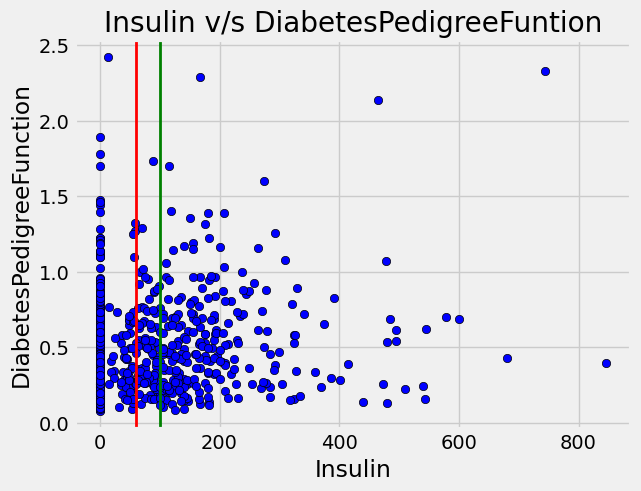

In [33]:
plt.style.use('fivethirtyeight')
plt.scatter(x='Insulin',y='DiabetesPedigreeFunction',data=diabetes_df,edgecolors='black',c='b')
plt.title("Insulin v/s DiabetesPedigreeFuntion")
plt.axvline(x=60,linewidth=2,color='red')
plt.axvline(x=100,linewidth=2,color='green')
plt.xlabel('Insulin')
plt.ylabel("DiabetesPedigreeFunction")

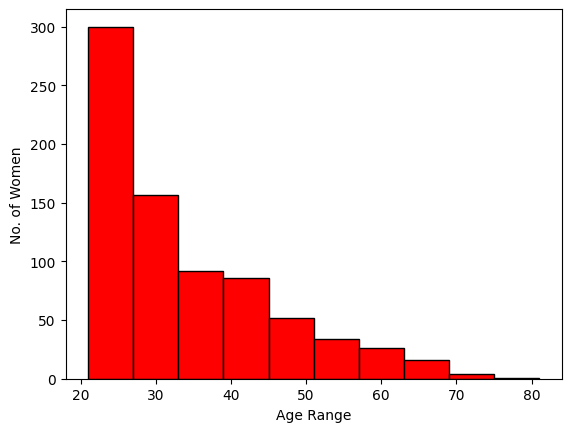

In [10]:
plt.xlabel("Age Range")
plt.ylabel("No. of Women")
plt.hist(x='Age',data=diabetes_df,color='red',edgecolor='black');

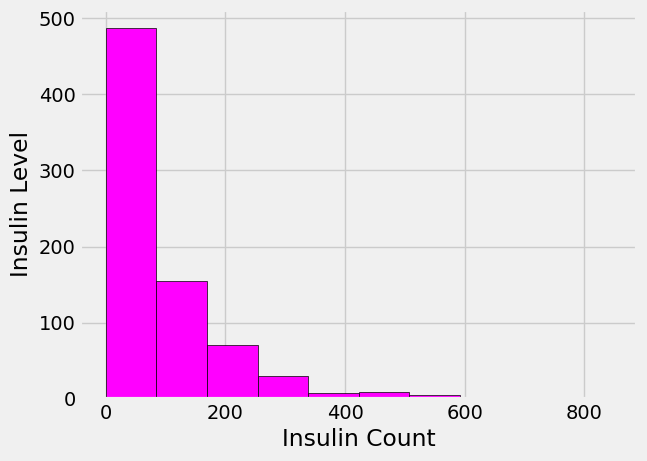

In [31]:
plt.xlabel("Insulin Count")
plt.ylabel("Insulin Level")
plt.hist(x='Insulin',data=diabetes_df,color='magenta',edgecolor='black');

Text(0.5, 0, 'Skin Thickness')

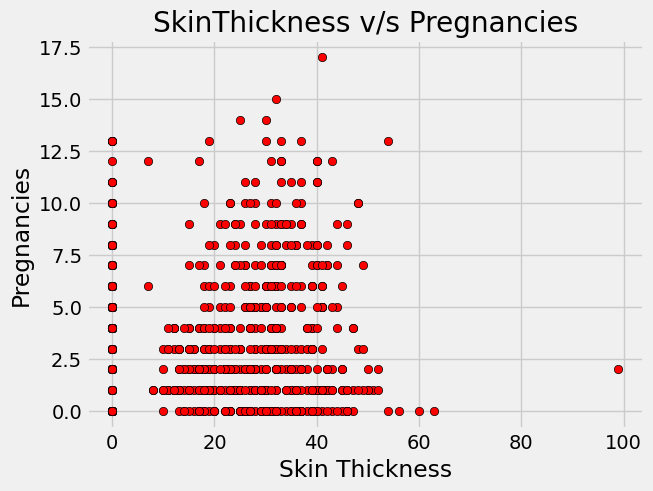

In [34]:
plt.style.use('fivethirtyeight')
plt.scatter(x='SkinThickness',y='Pregnancies',data=diabetes_df,edgecolors='black',c='r')
plt.title("SkinThickness v/s Pregnancies")
plt.ylabel('Pregnancies')
plt.xlabel("Skin Thickness")

In [37]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Scaling the Dataframe as there is high variance between values of different parameters in the dataframe
When we fit using the standard scaler the original dataframe is changed using new values 

In [46]:
scaler=StandardScaler()
scaler.fit(diabetes_df)

StandardScaler()

In [47]:
transformed_df=scaler.transform(diabetes_df)

In [52]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
print(transformed_df)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


In [51]:
# Train Test Split
X= diabetes_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPredigreeFunction','Age']]
Y=diabetes_df['Outcome']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

In [42]:
Linear_model=LogisticRegression()

In [43]:
Linear_model.fit(x_train,y_train)

c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()